In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
frames=np.load("outfile_x.npy")
y_train=np.load("outfile_y.npy")

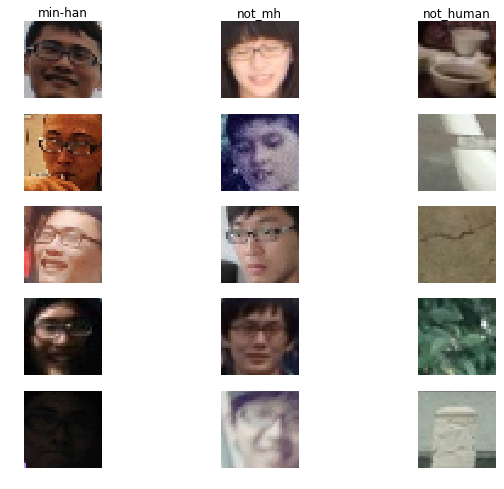

In [3]:
classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(frames[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [4]:
arr = np.arange(len(frames))
np.random.shuffle(arr)
x_train=frames[arr]
y_train=y_train[arr].astype('uint8')

x_train_temp = np.empty((x_train.shape[0],x_train.shape[3],x_train.shape[1],x_train.shape[2]))
print "there are "+ str(x_train.shape[0]) + " images"
for j in range(x_train.shape[0]):
    for i in range(x_train.shape[3]):
        x_train_temp[j,i,:,:]=x_train[j,:,:,i]
x_train=x_train_temp

## this one used to reinMH
#mhInTraining=np.where(y_train[:int(len(x_train)*0.8)]==0)
#mhNotInTraining=np.where(y_train[:int(len(x_train)*0.8)]!=0)
#idx_mh=np.random.choice(mhInTraining[0], len(mhInTraining[0])*2, replace=True)
#rein_mh=np.hstack((idx_mh,mhNotInTraining[0][:int(len(mhNotInTraining[0])*0.8)]))
#arr = np.arange(len(rein_mh))
#rein_mh=rein_mh[arr]


data={
  'X_train': x_train[:int(len(x_train)*0.8)],
  'y_train': y_train[:int(len(x_train)*0.8)],
  'X_val': x_train[int(len(x_train)*0.8):],
  'y_val': y_train[int(len(x_train)*0.8):],
}
print "there are "+ str(data['X_train'].shape[0]) + " images in training set"
print "there are "+ str(data['X_val'].shape[0]) + " images in testing set"

there are 963 images
there are 770 images in training set
there are 193 images in testing set


In [5]:
#this cell will load pretrained model
import pickle 
with open('Whimh_model.dkl','rb') as input:
    model=pickle.load(input)

In [6]:
#using models maked in cs231n assignment2
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

In [7]:
#over fitting at small data
from cs231n.classifiers.cnn import *

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

#model = ConvNet(hidden_dims=[32,32,32],dropout=0,use_batchnorm=False,reg=0.001,pool_period=3)

solver = Solver(model, small_data,
                num_epochs=12, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=10)
solver.train()


(Iteration 1 / 12) loss: 2.292094
(Epoch 1 / 12) train acc: 0.680000; val_acc: 0.678756; min_acc: 0.000000; mnt_acc: 1.000000; nhn_acc: 0.211268
(Epoch 2 / 12) train acc: 0.680000; val_acc: 0.626943; min_acc: 0.000000; mnt_acc: 1.000000; nhn_acc: 0.169014
(Epoch 3 / 12) train acc: 0.780000; val_acc: 0.751295; min_acc: 0.000000; mnt_acc: 0.971698; nhn_acc: 0.352113
(Epoch 4 / 12) train acc: 0.780000; val_acc: 0.766839; min_acc: 0.000000; mnt_acc: 0.886792; nhn_acc: 0.577465
(Epoch 5 / 12) train acc: 0.820000; val_acc: 0.797927; min_acc: 0.000000; mnt_acc: 0.915094; nhn_acc: 0.676056
(Epoch 6 / 12) train acc: 0.920000; val_acc: 0.777202; min_acc: 0.125000; mnt_acc: 0.867925; nhn_acc: 0.535211
(Epoch 7 / 12) train acc: 0.980000; val_acc: 0.725389; min_acc: 0.125000; mnt_acc: 0.820755; nhn_acc: 0.492958
(Epoch 8 / 12) train acc: 0.900000; val_acc: 0.652850; min_acc: 0.312500; mnt_acc: 0.632075; nhn_acc: 0.563380
(Epoch 9 / 12) train acc: 0.980000; val_acc: 0.751295; min_acc: 0.187500; mnt_

In [8]:
#model = ConvNet(hidden_dims=[64,64,128,128,256,256,512,512],hidden_dim=[4096,4096,1000],
#                dropout=0.6,use_batchnorm=True,reg=1e-4,pool_period=2)
#model = ConvNet(hidden_dims=[16],hidden_dim=[15],
#                dropout=0.1,use_batchnorm=False,reg=0.5,pool_period=2)
model = ConvNet(hidden_dims=[64,128,256],hidden_dim=[1024,500],
                dropout=0.5,use_batchnorm=False,reg=2*1e-4,pool_period=1,num_classes=3)
solver = Solver(model, data,
                num_epochs=30, batch_size=60,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=30)

In [9]:
solver.train()

(Iteration 1 / 360) loss: 1.144513
(Epoch 0 / 30) train acc: 0.550649; val_acc: 0.549223; min_acc: 0.000000; mnt_acc: 1.000000; nhn_acc: 0.000000
(Epoch 1 / 30) train acc: 0.641558; val_acc: 0.668394; min_acc: 0.000000; mnt_acc: 0.613208; nhn_acc: 0.901408
(Epoch 2 / 30) train acc: 0.550649; val_acc: 0.549223; min_acc: 0.000000; mnt_acc: 1.000000; nhn_acc: 0.000000
(Iteration 31 / 360) loss: 1.056710
(Epoch 3 / 30) train acc: 0.700000; val_acc: 0.668394; min_acc: 0.000000; mnt_acc: 0.962264; nhn_acc: 0.380282
(Epoch 4 / 30) train acc: 0.761039; val_acc: 0.766839; min_acc: 0.000000; mnt_acc: 0.839623; nhn_acc: 0.830986
(Epoch 5 / 30) train acc: 0.679221; val_acc: 0.715026; min_acc: 0.000000; mnt_acc: 0.660377; nhn_acc: 0.957746
(Iteration 61 / 360) loss: 0.664210
(Epoch 6 / 30) train acc: 0.653247; val_acc: 0.704663; min_acc: 0.000000; mnt_acc: 0.632075; nhn_acc: 0.971831
(Epoch 7 / 30) train acc: 0.753247; val_acc: 0.746114; min_acc: 0.000000; mnt_acc: 0.764151; nhn_acc: 0.887324
(Iter

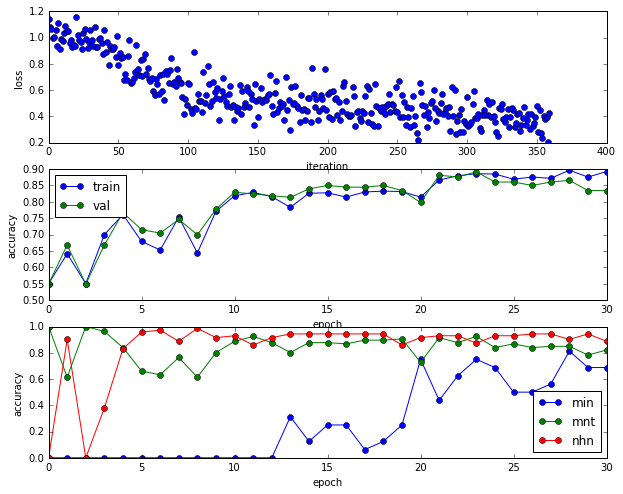

In [10]:
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(3, 1, 3)
plt.plot(solver.val_min_history, '-o')
plt.plot(solver.val_mnt_history, '-o')
plt.plot(solver.val_nhn_history, '-o')
plt.legend(['min', 'mnt','nhn'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()



In [11]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          98
(not_human, not_human)    62
(min-han, min-han)        12
(not_human, mh_not)        8
(mh_not, not_human)        5
(min-han, mh_not)          3
(mh_not, min-han)          3
(min-han, not_human)       1
(not_human, min-han)       1
dtype: int64


In [12]:
solver.train()

(Iteration 1 / 360) loss: 0.355656
(Epoch 30 / 30) train acc: 0.880519; val_acc: 0.886010; min_acc: 0.625000; mnt_acc: 0.924528; nhn_acc: 0.887324
(Epoch 31 / 30) train acc: 0.894805; val_acc: 0.886010; min_acc: 0.750000; mnt_acc: 0.877358; nhn_acc: 0.929577
(Epoch 32 / 30) train acc: 0.883117; val_acc: 0.854922; min_acc: 0.687500; mnt_acc: 0.820755; nhn_acc: 0.943662
(Iteration 31 / 360) loss: 0.485902
(Epoch 33 / 30) train acc: 0.870130; val_acc: 0.839378; min_acc: 0.625000; mnt_acc: 0.830189; nhn_acc: 0.901408
(Epoch 34 / 30) train acc: 0.887013; val_acc: 0.849741; min_acc: 0.687500; mnt_acc: 0.811321; nhn_acc: 0.943662
(Epoch 35 / 30) train acc: 0.889610; val_acc: 0.839378; min_acc: 0.687500; mnt_acc: 0.830189; nhn_acc: 0.887324
(Iteration 61 / 360) loss: 0.431181
(Epoch 36 / 30) train acc: 0.874026; val_acc: 0.834197; min_acc: 0.812500; mnt_acc: 0.801887; nhn_acc: 0.887324
(Epoch 37 / 30) train acc: 0.905195; val_acc: 0.865285; min_acc: 0.625000; mnt_acc: 0.858491; nhn_acc: 0.9295

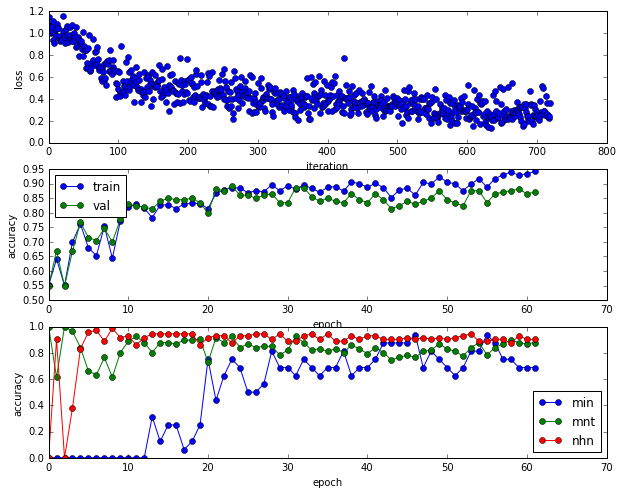

In [13]:
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(3, 1, 3)
plt.plot(solver.val_min_history, '-o')
plt.plot(solver.val_mnt_history, '-o')
plt.plot(solver.val_nhn_history, '-o')
plt.legend(['min', 'mnt','nhn'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()



In [14]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          93
(not_human, not_human)    64
(min-han, min-han)        11
(not_human, mh_not)        7
(mh_not, not_human)        7
(mh_not, min-han)          6
(min-han, mh_not)          4
(min-han, not_human)       1
dtype: int64


In [15]:
solver.train()

(Iteration 1 / 360) loss: 0.339323
(Epoch 60 / 30) train acc: 0.933766; val_acc: 0.865285; min_acc: 0.625000; mnt_acc: 0.877358; nhn_acc: 0.901408
(Epoch 61 / 30) train acc: 0.920779; val_acc: 0.844560; min_acc: 0.812500; mnt_acc: 0.811321; nhn_acc: 0.901408
(Epoch 62 / 30) train acc: 0.916883; val_acc: 0.860104; min_acc: 0.875000; mnt_acc: 0.811321; nhn_acc: 0.929577
(Iteration 31 / 360) loss: 0.389383
(Epoch 63 / 30) train acc: 0.937662; val_acc: 0.875648; min_acc: 0.875000; mnt_acc: 0.858491; nhn_acc: 0.901408
(Epoch 64 / 30) train acc: 0.944156; val_acc: 0.886010; min_acc: 0.812500; mnt_acc: 0.886792; nhn_acc: 0.901408
(Epoch 65 / 30) train acc: 0.937662; val_acc: 0.875648; min_acc: 0.875000; mnt_acc: 0.858491; nhn_acc: 0.901408
(Iteration 61 / 360) loss: 0.287298
(Epoch 66 / 30) train acc: 0.915584; val_acc: 0.839378; min_acc: 0.875000; mnt_acc: 0.801887; nhn_acc: 0.887324
(Epoch 67 / 30) train acc: 0.940260; val_acc: 0.844560; min_acc: 0.750000; mnt_acc: 0.830189; nhn_acc: 0.8873

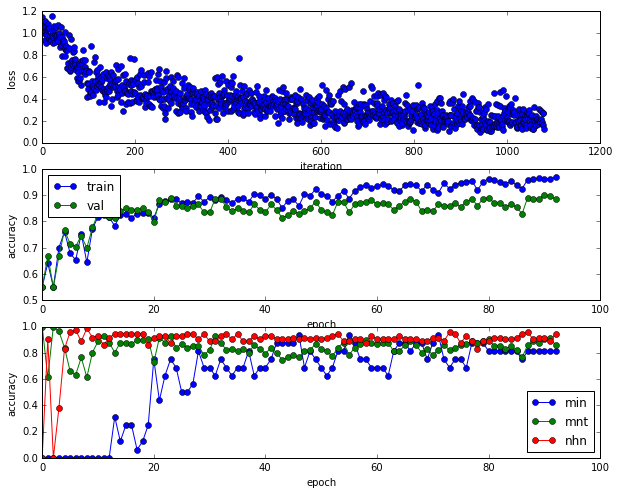

In [16]:
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(3, 1, 3)
plt.plot(solver.val_min_history, '-o')
plt.plot(solver.val_mnt_history, '-o')
plt.plot(solver.val_nhn_history, '-o')
plt.legend(['min', 'mnt','nhn'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()



In [17]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          96
(not_human, not_human)    65
(min-han, min-han)        13
(mh_not, min-han)          5
(mh_not, not_human)        5
(not_human, mh_not)        4
(min-han, mh_not)          2
(not_human, min-han)       2
(min-han, not_human)       1
dtype: int64


In [18]:
solver.train()

(Iteration 1 / 360) loss: 0.170918
(Epoch 90 / 30) train acc: 0.966234; val_acc: 0.901554; min_acc: 0.812500; mnt_acc: 0.905660; nhn_acc: 0.915493
(Epoch 91 / 30) train acc: 0.964935; val_acc: 0.875648; min_acc: 0.812500; mnt_acc: 0.849057; nhn_acc: 0.929577
(Epoch 92 / 30) train acc: 0.967532; val_acc: 0.886010; min_acc: 0.812500; mnt_acc: 0.877358; nhn_acc: 0.915493
(Iteration 31 / 360) loss: 0.214080
(Epoch 93 / 30) train acc: 0.937662; val_acc: 0.854922; min_acc: 0.812500; mnt_acc: 0.801887; nhn_acc: 0.943662
(Epoch 94 / 30) train acc: 0.961039; val_acc: 0.870466; min_acc: 0.812500; mnt_acc: 0.839623; nhn_acc: 0.929577
(Epoch 95 / 30) train acc: 0.957143; val_acc: 0.854922; min_acc: 0.812500; mnt_acc: 0.820755; nhn_acc: 0.915493
(Iteration 61 / 360) loss: 0.155570
(Epoch 96 / 30) train acc: 0.970130; val_acc: 0.886010; min_acc: 0.750000; mnt_acc: 0.877358; nhn_acc: 0.929577
(Epoch 97 / 30) train acc: 0.970130; val_acc: 0.896373; min_acc: 0.812500; mnt_acc: 0.896226; nhn_acc: 0.9154

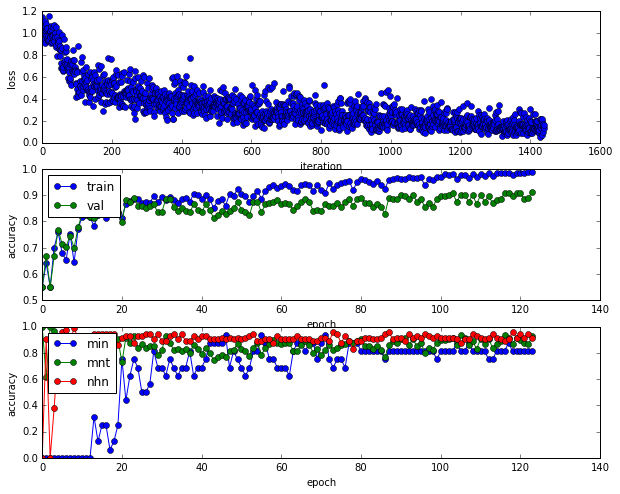

In [19]:
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(3, 1, 3)
plt.plot(solver.val_min_history, '-o')
plt.plot(solver.val_mnt_history, '-o')
plt.plot(solver.val_nhn_history, '-o')
plt.legend(['min', 'mnt','nhn'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()



In [20]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          98
(not_human, not_human)    65
(min-han, min-han)        13
(mh_not, min-han)          6
(not_human, mh_not)        3
(not_human, min-han)       3
(min-han, mh_not)          2
(mh_not, not_human)        2
(min-han, not_human)       1
dtype: int64


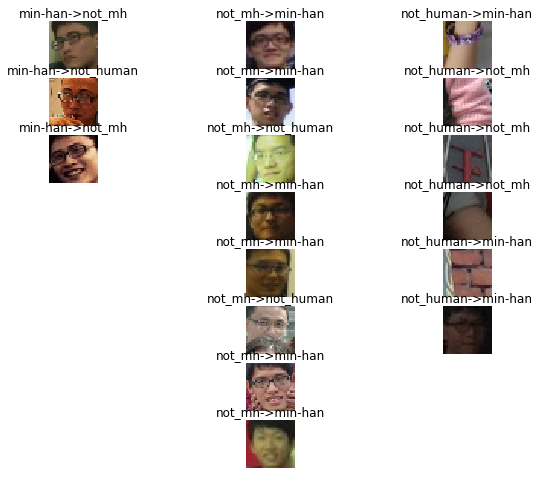

In [21]:
#visualize validation results
preIdx=np.argmax(test_result, axis=1)
wrongIdx=np.where(preIdx!=data['y_val'])
imgTemp=data['X_val'][wrongIdx]
imgLabel=data['y_val'][wrongIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 8
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    try:
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
    except:
        pass
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        try:
            plt.imshow(imgTemp[idx].astype('uint8'))
        except :
            pass
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[wrongIdx][idx]])
plt.show()

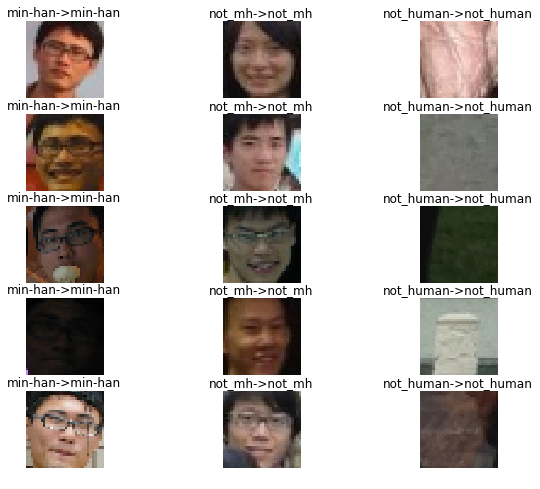

In [22]:
#visualize those predicted correctly
preIdx=np.argmax(test_result, axis=1)
trueIdx=np.where(preIdx==data['y_val'])
imgTemp=data['X_val'][trueIdx]
imgLabel=data['y_val'][trueIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgTemp[idx].astype('uint8'))
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[trueIdx][idx]])
plt.show()

In [23]:
#using model to predict training set
test_result=model.loss(data['X_train'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_train'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          419
(not_human, not_human)    253
(min-han, min-han)         90
(mh_not, min-han)           4
(min-han, mh_not)           2
(not_human, mh_not)         1
(mh_not, not_human)         1
dtype: int64


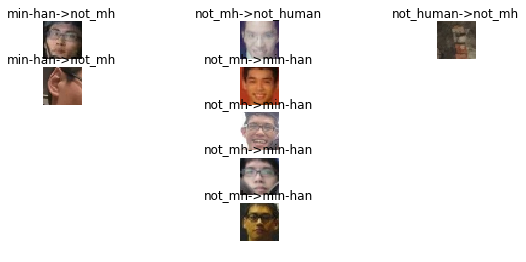

In [24]:
preIdx=np.argmax(test_result, axis=1)
wrongIdx=np.where(preIdx!=data['y_train'])
imgTemp=data['X_train'][wrongIdx]
imgLabel=data['y_train'][wrongIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    try:
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
    except:
        pass
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        try:
            plt.imshow(imgTemp[idx].astype('uint8'))
        except :
            pass
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[wrongIdx][idx]])
plt.show()

In [25]:
with open('Whimh_model.dkl','wb') as output:
    pickle.dump(model,output,pickle.HIGHEST_PROTOCOL)